In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

print(tf.__version__)
print(os.getcwd())
reverse_word_index = None
train_data = None
train_labels = None
test_data = None
test_labels = None
history = None

1.12.0
E:\Projects\machineLearning\tensorflow\src\myPractise\imdb


### Get data and create dictionary for word index

In [2]:
def loadDatasets():
    global train_data, train_labels, test_data, test_labels
    imdb = keras.datasets.imdb
    (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000, path=os.getcwd() + (r"\datasets\imdp.npz"))
    print("Training entries:{}, labels:{}".format(len(train_data), len(train_labels)))
    print("train_data.shape:{}\nlength of train_data[0]:{} length of train_data[1]:{}"
          .format(train_data.shape, len(train_data[0]), len(train_data[1])))
    
    global reverse_word_index
    # A dictionary mapping words to an integer index
    word_index = imdb.get_word_index(path=os.getcwd() + r"\datasets\imdb_word_index.json")

    # The first indices are reserved
    word_index = {k:(v+3) for k,v in word_index.items()}
    word_index["<PAD>"] = 0
    word_index["<START>"] = 1
    word_index["<UNK>"] = 2  # unknown
    word_index["<UNUSED>"] = 3

    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    
    train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                           value = word_index["<PAD>"],
                                                           padding = 'post',
                                                           maxlen = 256)
    test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [4]:
def decode_review(text):
    return ' '.join([reverse_word_index[i] for i in text])

In [10]:
def neualNetwork():
    global history
    vocab_size = 10000
    
    model = keras.Sequential()
    model.add(keras.layers.Embedding(vocab_size, 16))
    model.add(keras.layers.GlobalAveragePooling1D())
    model.add(keras.layers.Dense(16, activation = tf.nn.relu))
    model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid))
    model.compile(optimizer = tf.train.AdamOptimizer(),
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])
    model.summary()
    x_val = train_data[:10000]
    partial_x_train = train_data[10000:]
    y_val = train_labels[:10000]
    partial_y_train = train_labels[10000:]
    
    history = model.fit(partial_x_train,
                       partial_y_train,
                       epochs = 40,
                       batch_size =512,
                       validation_data = (x_val, y_val),
                       verbose =1)
    result = model.evaluate(test_data, test_labels)
    print(result)

In [13]:
def drawTrade():
    import matplotlib.pyplot as plt
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.clf()   # clear figure
    acc_values = history.history['acc']
    val_acc_values = history.history['val_acc']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

### Main()

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

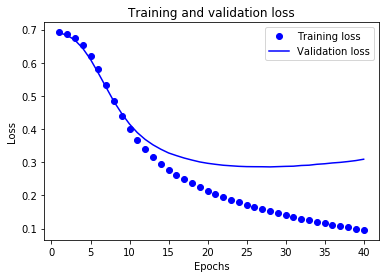

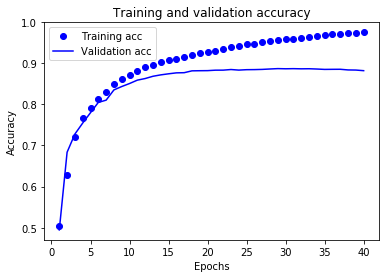

In [14]:
if __name__=='__main__':
    isPrepareDatasetsNeeded = False
    if isPrepareDatasetsNeeded:
        loadDatasets()
        neualNetwork()
    print(decode_review(train_data[0]))
    drawTrade()